In [ ]:
import numpy as np
import pandas as pd
import loadnhanes
import argparse
from sklearn.impute import SimpleImputer as Imputer

X,y = loadnhanes._load()

# clean up a bit
for c in X.columns:
    if c.endswith("_isBlank"):
        del X[c]   
X["bmi"] = 10000 * X["weight"].values.copy() / (X["height"].values.copy() * X["height"].values.copy())
X["bmi_binary"]=(X['bmi'] > 30).astype(int)

del X["bmi"]
del X["weight"]
del X["height"]
del X["urine_hematest_isTrace"] # would have no variance in the strain set
del X["SGOT_isBlankbutapplicable"] # would have no variance in the strain set
del X["calcium_isBlankbutapplicable"] # would have no variance in the strain set
del X["uric_acid_isBlankbutapplicable"] # would only have one true value in the train set
del X["urine_hematest_isVerylarge"] # would only have one true value in the train set
del X["total_bilirubin_isBlankbutapplicable"] # would only have one true value in the train set
del X["alkaline_phosphatase_isBlankbutapplicable"] # would only have one true value in the train set
del X["hemoglobin_isUnacceptable"] # redundant with hematocrit_isUnacceptable
rows = np.where(np.invert(np.isnan(X["systolic_blood_pressure"]) | np.isnan(X["bmi"])))[0]
X = X.iloc[rows,:]
y = y[rows]

print('Dimensions after loading as Lundberg:',X.shape)


alot_of_missing = []
for col in X.columns:
    if np.isnan(X[col]).mean()>0.5:
        alot_of_missing.append(col)
X = X.drop(alot_of_missing,axis=1)

print('Dimensions after dropping:',X.shape)

imp = Imputer()
imp.fit(X)
X_imp = imp.transform(X)

X1 = pd.DataFrame(X_imp,columns=X.columns)
df = pd.concat([X1,pd.Series(y>0,dtype=np.int8,name='death')],axis=1)


# Define target
sbp = 'systolic_blood_pressure'
puls_pres = df.pop('pulse_pressure') 
df.insert(0, 'high_pulse_pressure', ((puls_pres>60)).astype(np.int16))

# # Standardize
# for col in df.columns:
#     if len(df[col].unique())>2:
#         df[col] = (df[col]-df[col].mean())/df[col].var()

print('shape:',df.shape)
print('treated:',df['high_pulse_pressure'].mean())
print('dead:',df['death'].mean())


df.to_pickle('NHANES_removed_bmi.pkl')



number of people surviving  9622
number of people not surviving  4785
Dimensions after loading as Lundberg: (14264, 79)
Dimensions after dropping: (14264, 64)
shape: (14264, 65)
treated: 0.21880257992148064
dead: 0.3302720134604599


<Axes: >

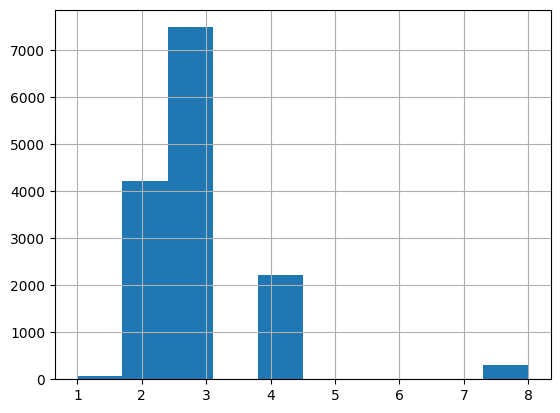

In [8]:
df['physical_activity'].hist()